# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
print (cities)

['urumqi', 'poum', 'bathsheba', 'san cristobal', 'yumen', 'rikitea', 'zharkent', 'kathmandu', 'isla aguada', 'dubai', 'rochegda', 'ksenyevka', 'saint-philippe', 'tautira', 'albany', 'richards bay', 'hithadhoo', 'melfi', 'belushya guba', 'butaritari', 'dikson', 'ushuaia', 'kaitangata', 'quatre cocos', 'port blair', 'progreso', 'beyneu', 'vaini', 'lebu', 'bluff', 'kruisfontein', 'los llanos de aridane', 'berlevag', 'nikolskoye', 'castro', 'chepo', 'marsaxlokk', 'saldanha', 'kargasok', 'raymondville', 'saskylakh', 'sisimiut', 'kapaa', 'tuatapere', 'karratha', 'grand river south east', 'umm kaddadah', 'atuona', 'hermanus', 'flinders', 'ilulissat', 'cidreira', 'kavaratti', 'swan hill', 'bayanday', 'payakumbuh', 'sur', 'faya', 'lolua', 'victoria', 'port-cartier', 'kodiak', 'muisne', 'manokwari', 'dubna', 'chuy', 'longyearbyen', 'sakakah', 'thompson', 'new norfolk', 'port alfred', 'khatanga', 'norman wells', 'portland', 'punta arenas', 'faanui', 'rio gallegos', 'sochi', 'brownsville', 'tsihom

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
c_id=[]
name=[]
Lat=[]
Long=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

for city in cities:
           
    response = requests.get(query_url + city).json()
    try:
        c_id.append(response['id'])
        name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    
weather_dict= {
      
   "City":name, 
     "Lat": Lat,
     "Long":Long,
     "maxtemp": temp_max,
     "humidity": humidity,
     "cloudiness": cloudiness,
     "windspeed": wind_speed, 
     "country": country,
     "date": date
       
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)



weather_data. to_csv("cities2.csv")
#cities_pd.to_csv("Airport_Output.csv")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [5]:
weather_data.head(10)


,City,Lat,Long,maxtemp,humidity,cloudiness,windspeed,country,date
0,Ürümqi,43.8010,87.6005,-6.65,84,75,2.24,CN,1643504407
1,Poum,-20.2333,164.0167,81.84,76,99,9.04,NC,1643504438
2,Bathsheba,13.2167,-59.5167,77.61,69,40,16.11,BB,1643503853
3,San Cristobal,7.7669,-72.2250,65.93,84,69,3.06,VE,1643504439
4,Yumen,40.2833,97.2000,11.37,66,0,7.63,CN,1643504087
5,Rikitea,-23.1203,-134.9692,76.98,71,100,8.48,PF,1643503985
6,Zharkent,44.1628,80.0000,23.22,59,88,1.01,KZ,1643504439
7,Kathmandu,27.7167,85.3167,39.42,93,40,2.30,NP,1643504406
8,Isla Aguada,18.7833,-91.4667,71.17,66,19,19.69,MX,1643504440
9,Dubai,25.2582,55.3047,69.22,77,0,4.61,AE,1643504354


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_city_data_df= weather_data.loc[weather_data["humidity"] <= 100]
clean_city_data_df.head(50)

,City,Lat,Long,maxtemp,humidity,cloudiness,windspeed,country,date
0,Ürümqi,43.8010,87.6005,-6.65,84,75,2.24,CN,1643504407
1,Poum,-20.2333,164.0167,81.84,76,99,9.04,NC,1643504438
2,Bathsheba,13.2167,-59.5167,77.61,69,40,16.11,BB,1643503853
3,San Cristobal,7.7669,-72.2250,65.93,84,69,3.06,VE,1643504439
4,Yumen,40.2833,97.2000,11.37,66,0,7.63,CN,1643504087
5,Rikitea,-23.1203,-134.9692,76.98,71,100,8.48,PF,1643503985
6,Zharkent,44.1628,80.0000,23.22,59,88,1.01,KZ,1643504439
7,Kathmandu,27.7167,85.3167,39.42,93,40,2.30,NP,1643504406
8,Isla Aguada,18.7833,-91.4667,71.17,66,19,19.69,MX,1643504440
9,Dubai,25.2582,55.3047,69.22,77,0,4.61,AE,1643504354


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

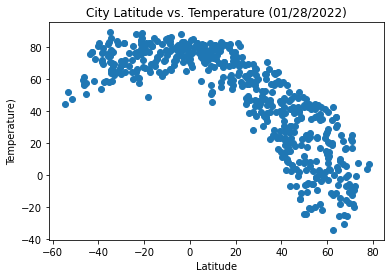

In [9]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#DF_Capomulin=Reduced_data_df[Reduced_data_df['Drug Regimen']=='Capomulin']
#DF_Capomulin
#Average=DF_Capomulin.groupby(["Mouse ID"]).mean()
#Average["Tumor Volume (mm3)"]      

plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['maxtemp'])

plt.xlabel("Latitude")
plt.ylabel("Temperature)")
plt.title('City Latitude vs. Temperature (01/28/2022)')

plt.show()

## Latitude vs. Humidity Plot

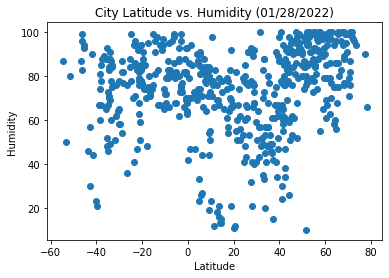

In [10]:
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['humidity'])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('City Latitude vs. Humidity (01/28/2022)')

plt.show()

## Latitude vs. Cloudiness Plot

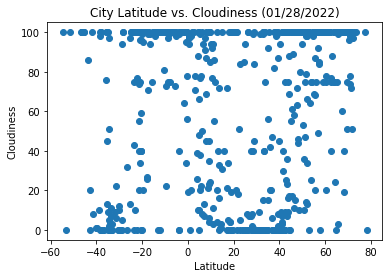

In [11]:
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['cloudiness'])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('City Latitude vs. Cloudiness (01/28/2022)')

plt.show()

## Latitude vs. Wind Speed Plot

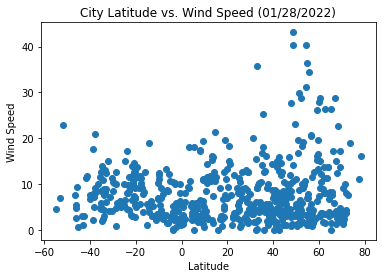

In [12]:
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['windspeed'])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('City Latitude vs. Wind Speed (01/28/2022)')

plt.show()

## Linear Regression

In [35]:
Northern_Hemisphere_DF=weather_data.loc[weather_data["Lat"]>=0]
#clean_city_data_df= weather_data.loc[weather_data["humidity"] <= 100]
Northern_Hemisphere_DF.count()
Northern_Hemisphere_DF.head(15)

,City,Lat,Long,maxtemp,humidity,cloudiness,windspeed,country,date
0,Ürümqi,43.8010,87.6005,-6.65,84,75,2.24,CN,1643504407
2,Bathsheba,13.2167,-59.5167,77.61,69,40,16.11,BB,1643503853
3,San Cristobal,7.7669,-72.2250,65.93,84,69,3.06,VE,1643504439
4,Yumen,40.2833,97.2000,11.37,66,0,7.63,CN,1643504087
6,Zharkent,44.1628,80.0000,23.22,59,88,1.01,KZ,1643504439
7,Kathmandu,27.7167,85.3167,39.42,93,40,2.30,NP,1643504406
8,Isla Aguada,18.7833,-91.4667,71.17,66,19,19.69,MX,1643504440
9,Dubai,25.2582,55.3047,69.22,77,0,4.61,AE,1643504354
10,Rochegda,62.8000,43.2500,-0.13,100,88,3.56,RU,1643504441
13,Albany,42.6001,-73.9662,8.85,61,100,15.99,US,1643504300


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      30.794563
2      69.258986
3      76.112941
4      35.218608
6      30.339545
         ...    
548    16.828835
550    15.766496
552    73.849418
554    44.671501
555    13.809463
Name: Lat, Length: 383, dtype: float64
0      30.794563
2      69.258986
3      76.112941
4      35.218608
6      30.339545
         ...    
548    16.828835
550    15.766496
552    73.849418
554    44.671501
555    13.809463
Name: Lat, Length: 383, dtype: float64
y = -1.26x +85.88


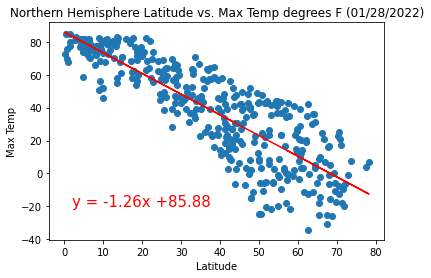

The The correlation between Latitude and the  max temp is: -0.8422670163218285


In [36]:
plt.scatter(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['maxtemp'])

plt.xlabel("Latitude")
plt.ylabel("Max_Temp")
plt.title('Northern Hemisphere Max_Temp vs. Latitude (01/28/2022)')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['maxtemp'])
regress_values = Northern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Northern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Northern Hemisphere Latitude vs. Max Temp degrees F (01/28/2022)')


plt.annotate(line_eq,(2,-20),fontsize=15,color="red")
plt.savefig('Nothern MaxTemp.png')
plt.show()
# Print r value
print(f"The The correlation between Latitude and the  max temp is: {rvalue}")
plt.show()

In [37]:
Southern_Hemisphere_DF=weather_data.loc[weather_data["Lat"]<0]
#clean_city_data_df= weather_data.loc[weather_data["humidity"] <= 100]
Southern_Hemisphere_DF.head(15)

,City,Lat,Long,maxtemp,humidity,cloudiness,windspeed,country,date
1,Poum,-20.2333,164.0167,81.84,76,99,9.04,NC,1643504438
5,Rikitea,-23.1203,-134.9692,76.98,71,100,8.48,PF,1643503985
11,Saint-Philippe,-21.3585,55.7679,76.59,83,75,10.29,RE,1643504016
12,Tautira,-17.7333,-149.1500,82.42,74,26,10.29,PF,1643504441
14,Richards Bay,-28.7830,32.0377,69.22,87,5,0.87,ZA,1643504043
15,Hithadhoo,-0.6000,73.0833,80.76,68,78,2.55,MV,1643504051
19,Ushuaia,-54.8000,-68.3000,44.26,87,100,4.61,AR,1643504001
20,Kaitangata,-46.2817,169.8464,56.28,96,100,5.35,NZ,1643504010
21,Quatre Cocos,-20.2078,57.7625,78.91,77,100,12.59,MU,1643504204
25,Vaini,-21.2000,-175.2000,81.77,76,100,11.88,TO,1643504019


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1      73.928787
5      73.085818
11     73.600243
12     74.658757
14     71.432379
         ...    
545    69.519772
549    78.742264
551    76.048414
553    66.529262
556    69.718294
Name: Lat, Length: 174, dtype: float64
1      73.928787
5      73.085818
11     73.600243
12     74.658757
14     71.432379
         ...    
545    69.519772
549    78.742264
551    76.048414
553    66.529262
556    69.718294
Name: Lat, Length: 174, dtype: float64
y = 0.29x +79.84


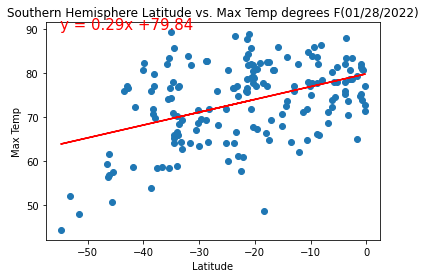

The The correlation between Latitude and the max temp is: 0.4383907416033052


In [38]:
plt.scatter(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['maxtemp'])

#plt.xlabel("Latitude")
#plt.ylabel("Max Temp")
#plt.title('Southern "Hemisphere Latitude vs. Max Temp (01/28/2022)')



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['maxtemp'])
regress_values = Southern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Southern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Southern Hemisphere Latitude vs. Max Temp degrees F(01/28/2022)')
plt.savefig('Southern Max Temp.png')

plt.show()
# Print r value
print(f"The The correlation between Latitude and the max temp is: {rvalue}")

0      75.530289
2      62.242751
3      59.875052
4      74.002003
6      75.687476
         ...    
548    80.354752
550    80.721737
552    60.656986
554    70.736500
555    81.397794
Name: Lat, Length: 383, dtype: float64
0      75.530289
2      62.242751
3      59.875052
4      74.002003
6      75.687476
         ...    
548    80.354752
550    80.721737
552    60.656986
554    70.736500
555    81.397794
Name: Lat, Length: 383, dtype: float64
y = 0.43x +56.5


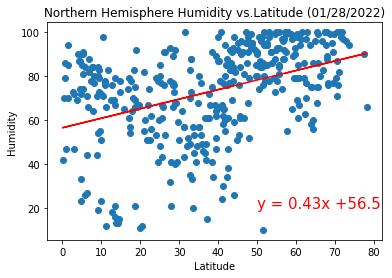

The The correlation between Latitude and the humidity temp is: 0.41224763009366505


In [39]:
plt.scatter(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['humidity'])





(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['humidity'])
regress_values = Northern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Northern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Northern Hemisphere Humidity vs.Latitude (01/28/2022)')
plt.savefig('Northern Humidity.png')

plt.show()
# Print r value
print(f"The The correlation between Latitude and the humidity temp is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      76.837800
5      76.127541
11     76.560978
12     77.452848
14     74.734407
         ...    
545    73.122905
549    80.893480
551    78.623729
553    70.603198
556    73.290174
Name: Lat, Length: 174, dtype: float64
1      76.837800
5      76.127541
11     76.560978
12     77.452848
14     74.734407
         ...    
545    73.122905
549    80.893480
551    78.623729
553    70.603198
556    73.290174
Name: Lat, Length: 174, dtype: float64
y = 0.25x +81.82


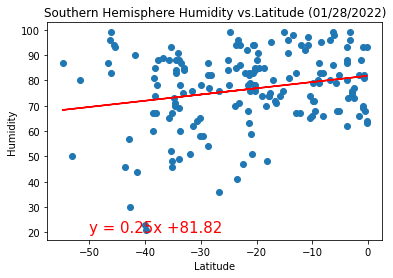

The The correlation between Latitude and humidity is: 0.219119334983756


In [40]:
plt.scatter(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['humidity'])

#plt.xlabel("Latitude")
#plt.ylabel("Max Temp")
#plt.title('Southern "Hemisphere Latitude vs. Max Temp (01/28/2022)')



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['humidity'])
regress_values = Southern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Southern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Southern Hemisphere Humidity vs.Latitude (01/28/2022)')
plt.savefig('Southern Humidity.png')

plt.show()
# Print r value
print(f"The The correlation between Latitude and humidity is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      62.032447
2      42.327802
3      38.816641
4      59.766087
6      62.265545
         ...    
548    69.186843
550    69.731061
552    39.976204
554    54.923536
555    70.733615
Name: Lat, Length: 383, dtype: float64
0      62.032447
2      42.327802
3      38.816641
4      59.766087
6      62.265545
         ...    
548    69.186843
550    69.731061
552    39.976204
554    54.923536
555    70.733615
Name: Lat, Length: 383, dtype: float64
y = 0.64x +33.81


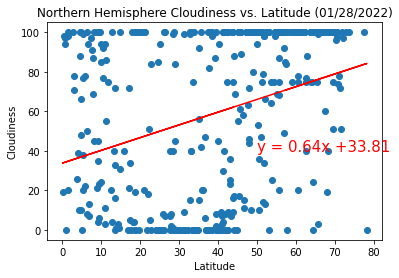

The The correlation between Lattitue and the cloudiness is: 0.3126325701231053


In [41]:
plt.scatter(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['cloudiness'])

plt.xlabel("Latitude")
plt.ylabel("Max_Temp")
plt.title('Northern Hemisphere Cloudiness vs. Latitude (01/28/2022)')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['cloudiness'])
regress_values = Northern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Northern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere Cloudiness vs. Latitude (01/28/2022)')


plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.savefig('Northern Cloudiness.png')
plt.show()
# Print r value
print(f"The The correlation between Lattitue and the cloudiness is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      65.682011
5      62.260804
11     64.348606
12     68.644608
14     55.550285
         ...    
545    47.787926
549    85.217613
551    74.284563
553    35.650877
556    48.593634
Name: Lat, Length: 174, dtype: float64
1      65.682011
5      62.260804
11     64.348606
12     68.644608
14     55.550285
         ...    
545    47.787926
549    85.217613
551    74.284563
553    35.650877
556    48.593634
Name: Lat, Length: 174, dtype: float64
y = 1.19x +89.66


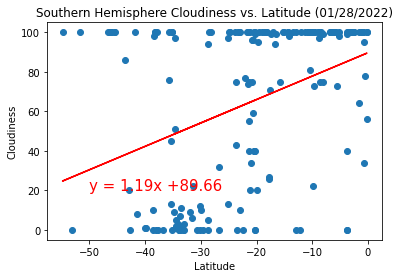

The The correlation between Lattitue and cloudiness is: 0.38095210054547046


In [42]:
plt.scatter(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['cloudiness'])

#plt.xlabel("Latitude")
#plt.ylabel("Max Temp")
#plt.title('Southern "Hemisphere Latitude vs. Max Temp (01/28/2022)')



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['cloudiness'])
regress_values = Southern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Southern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Southern Hemisphere Cloudiness vs. Latitude (01/28/2022)')
plt.savefig('Southern Cloudiness.png')

plt.show()
# Print r value
print(f"The The correlation between Lattitue and cloudiness is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      8.423431
2      6.620737
3      6.299516
4      8.216091
6      8.444756
         ...   
548    9.077956
550    9.127744
552    6.405599
554    7.773067
555    9.219463
Name: Lat, Length: 383, dtype: float64
0      8.423431
2      6.620737
3      6.299516
4      8.216091
6      8.444756
         ...   
548    9.077956
550    9.127744
552    6.405599
554    7.773067
555    9.219463
Name: Lat, Length: 383, dtype: float64
y = 0.06x +5.84


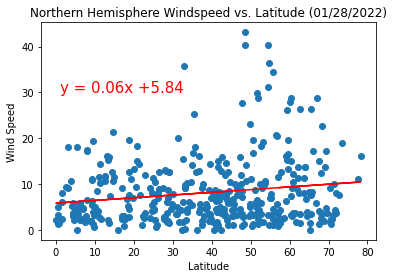

The The correlation between Lattitue and the windspeed is: 0.16388189091460503


In [43]:
plt.scatter(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['windspeed'])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere Wind Speed vs. Latitude (01/28/2022)')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Northern_Hemisphere_DF['Lat'], Northern_Hemisphere_DF['windspeed'])
regress_values = Northern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Northern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere Windspeed vs. Latitude (01/28/2022)')


plt.annotate(line_eq,(1,30),fontsize=15,color="red")
plt.savefig('Northern Windspeed.png')
plt.show()
# Print r value
print(f"The The correlation between Lattitue and the windspeed is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      7.262315
5      7.460673
11     7.339624
12     7.090547
14     7.849742
         ...   
545    8.299795
549    6.129661
551    6.763548
553    9.003488
556    8.253081
Name: Lat, Length: 174, dtype: float64
1      7.262315
5      7.460673
11     7.339624
12     7.090547
14     7.849742
         ...   
545    8.299795
549    6.129661
551    6.763548
553    9.003488
556    8.253081
Name: Lat, Length: 174, dtype: float64
y = -0.07x +5.87


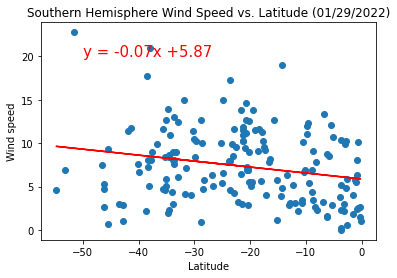

The The correlation between Lattitue and windspeed is: -0.221387687360765


In [44]:
plt.scatter(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['windspeed'])




(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Southern_Hemisphere_DF['Lat'], Southern_Hemisphere_DF['windspeed'])
regress_values = Southern_Hemisphere_DF['Lat'] * slope + intercept

print(regress_values)


#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
#regress_values = Average['Weight (g)'] * slope + intercept

print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.plot(Southern_Hemisphere_DF['Lat'],regress_values,"r-")

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.title('Southern Hemisphere Wind Speed vs. Latitude (01/29/2022)')

plt.savefig('Southern Windspeed.png')
plt.show()

# Print r value
print(f"The The correlation between Lattitue and windspeed is: {rvalue}")